In [54]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
# ---- Step 1: Load data ----
with open ("/kaggle/input/fbi-crime/FBI_CrimeData_2016.json") as f:
    crimeList = json.load(f)

In [56]:
# ---- Step 2: Define accumulation functions ----

def accum_crime(key, crime, data):
    """Accumulate a single crime type (e.g., 'Murder') by key ('Region' or 'State')"""
    result = {}
    for record in data:
        k = record[key]
        val = int(record[crime] or 0)
        result[k] = result.get(k, 0) + val
    return result

def accum_violent_crime(key, data):
    """Accumulate total violent crimes (Murder, Rape, Robbery, Assault) by key"""
    result = {}
    for record in data:
        k = record[key]
        violent_total = sum(int(record[c] or 0) for c in ["Murder", "Rape", "Robbery", "Assault"])
        result[k] = result.get(k, 0) + violent_total
    return result

def accum_nonviolent_crime(key, data):
    """Accumulate total non-violent crimes (Burglary, Theft, Vehicle_Theft) by key"""
    result = {}
    for record in data:
        k = record[key]
        nonviolent_total = sum(int(record[c] or 0) for c in ["Burglary", "Theft", "Vehicle_Theft"])
        result[k] = result.get(k, 0) + nonviolent_total
    return result


In [57]:
# ---- Step 3: Create dictionaries ----
murder_by_region = accum_crime("Region", "Murder", crimeList)
violent_by_region = accum_violent_crime("Region", crimeList)
nonviolent_by_region = accum_nonviolent_crime("Region", crimeList)

In [58]:
# ---- Step 4: Print dictionaries ----
Region = pd.DataFrame({
    "Region": murder_by_region.keys(),
    "Murders": murder_by_region.values(),
    "Violent Crimes": violent_by_region.values(),
    "Nonviolent Crimes": nonviolent_by_region.values()
})

Region

,Region,Murders,Violent Crimes,Nonviolent Crimes
0,South,5018,331011,2080097
1,West,2605,259401,1781665
2,Northeast,1674,156891,760200
3,Midwest,3304,211854,1226462


In [59]:
# ---- Step 5: Helper function to plot a single bar chart ----
def plot_crime_dict_single(crime_dict, title):
    """
    Plot one crime dictionary as a single bar chart.
    """
    keys = list(crime_dict.keys())
    values = list(crime_dict.values())
    
    plt.figure(figsize=(8, 5))
    plt.bar(keys, values, color="skyblue")
    plt.title(title)
    plt.ylabel("Number of Crimes")
    plt.xticks(rotation=0)
    plt.show()


# ---- Step 6: Function to plot three charts side-by-side ----
def plot_crime_dict(crime_dicts, titles):
    """
    Plot multiple crime dictionaries (3 dictionaries) in one row of subplots.
    Keeps your exact colors and style.
    """
    regions = list(crime_dicts[0].keys())
    colors = plt.cm.tab10(np.linspace(0, 1, len(regions)))
    
    fig, axes = plt.subplots(1, 3, figsize=(12, 4))  # fixed figure size (your original)
    
    for ax, crime_dict, title in zip(axes, crime_dicts, titles):
        keys = list(crime_dict.keys())
        values = list(crime_dict.values())
        
        # color map stays exactly the same as your code
        color_map = [colors[regions.index(k)] for k in keys]
        
        ax.bar(keys, values, color=color_map)
        ax.set_title(title, fontsize=11)
        ax.set_ylabel("Number of Crimes")
        ax.set_xticklabels(keys, rotation=45, ha='right', fontsize=9)
        ax.grid(axis='y', linestyle='--', alpha=0.6)

    plt.tight_layout()
    plt.show()



/tmp/ipykernel_39/1982582072.py:38: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(keys, rotation=45, ha='right', fontsize=9)


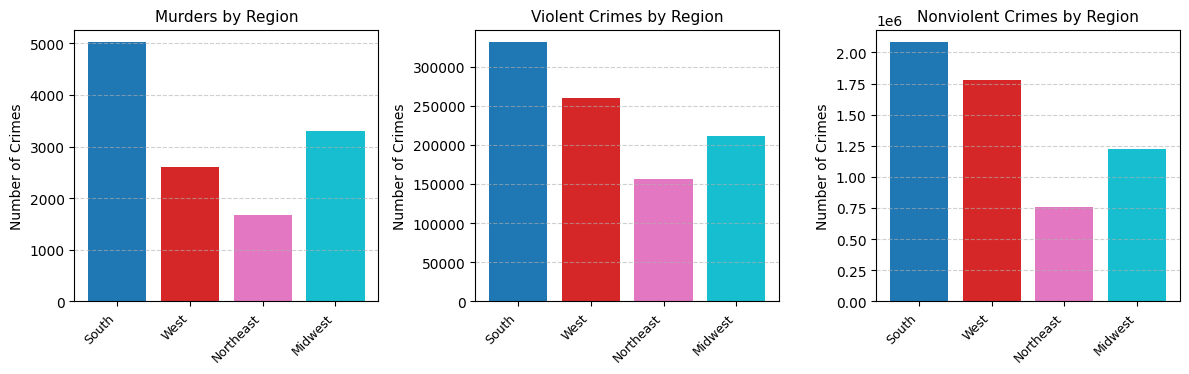

In [60]:
# ---- Step 7: Plot charts ----
plot_crime_dict(
    [murder_by_region, violent_by_region, nonviolent_by_region],
    ["Murders by Region", "Violent Crimes by Region", "Nonviolent Crimes by Region"]
)

#plt.savefig('plot1.png')

In [61]:
# ---- Step 8: Create dictionaries ----
murder_by_state = accum_crime("State", "Murder", crimeList)
violent_by_state = accum_violent_crime("State", crimeList)
nonviolent_by_state = accum_nonviolent_crime("State", crimeList)

In [62]:
# ---- Step 9: Violent crimes by State and distance from national mean ----
violent_by_state = accum_violent_crime("State", crimeList)

In [63]:
#---- Step 10: Convert to DataFrame for easier tabular printing
df_state = pd.DataFrame(list(violent_by_state.items()), columns=["State", "Violent_Total"])
national_mean = df_state["Violent_Total"].mean()
df_state["Distance_from_National_Mean"] = df_state["Violent_Total"] - national_mean
df_state.sort_values(by="Violent_Total", ascending=False)

,State,Violent_Total,Distance_from_National_Mean
4,CALIFORNIA,145205,126398.0
43,TEXAS,97872,79065.0
32,NEW YORK,66581,47774.0
13,ILLINOIS,50968,32161.0
9,FLORIDA,50540,31733.0
22,MICHIGAN,35790,16983.0
42,TENNESSEE,33433,14626.0
38,PENNSYLVANIA,32877,14070.0
35,OHIO,28235,9428.0
25,MISSOURI,25175,6368.0


In [64]:
# ---- Step 11: Heatmap for continuous variables ----
# This function plots a correlation heatmap for all numeric (continuous) columns in a DataFrame.
def plot_continuous_heatmap(df):
    """
    Plot a correlation heatmap for all continuous (numeric) variables.
    """
    # Select only numeric columns
    numeric_df = df.select_dtypes(include=['int64', 'float64'])
    
    # Compute correlation matrix
    corr = numeric_df.corr()

    # Plot heatmap
    plt.figure(figsize=(10, 6))
    sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
    plt.title("Correlation Heatmap of Continuous Variables")
    plt.show()

In [65]:
# ---- Step 12: Prepare numeric DataFrame from list ----
# Convert the list of crime data to a numeric DataFrame,
# coerce non-numeric values to NaN, and drop columns that are completely empty.
df_crimeList = pd.DataFrame(crimeList)
numeric_df = df_crimeList.apply(pd.to_numeric, errors='coerce')
numeric_df = numeric_df.dropna(axis=1, how='all')

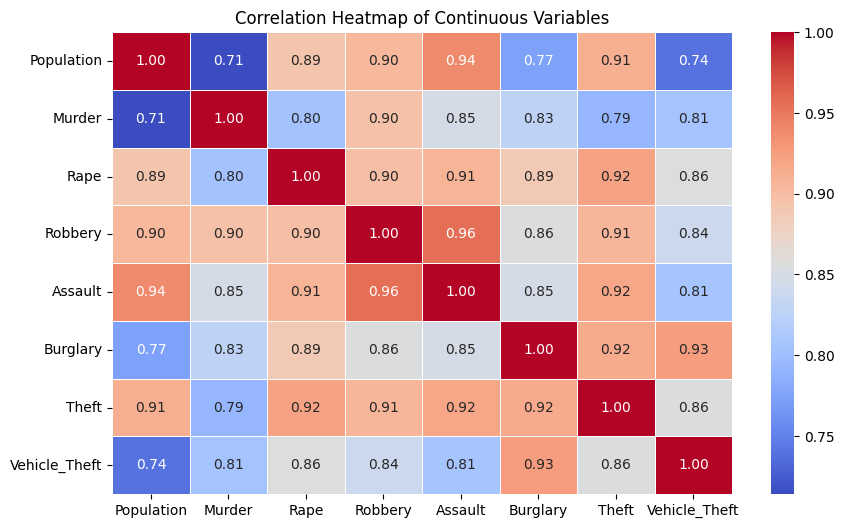

In [66]:
# ---- Step 13: Plot correlation heatmap for numeric variables ----
# Compute the correlation matrix for numeric columns
# and plot it as a heatmap with annotations.
corr = numeric_df.corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title("Correlation Heatmap of Continuous Variables")
plt.show()
